# Answer 1. What is the difference between Ordinal Encoding and Label Encoding? Provide an example of when you might choose one over the other.

Ordinal encoding and label encoding are both techniques used in machine learning to represent categorical variables as numerical values. However, they are applied in different scenarios and have distinct characteristics.

1. **Ordinal Encoding:**
   - Ordinal encoding is used when there is an inherent order or ranking among the categories in a categorical variable.
   - It assigns numerical values to categories based on their order or priority.
   - The numerical values assigned have meaningful interpretations in terms of the order of the categories.
   - Example: Consider a variable "Education Level" with categories like "High School," "Bachelor's Degree," "Master's Degree," and "Ph.D." Here, you can assign numerical values like 1, 2, 3, and 4 based on the increasing level of education.

In [4]:
# Example of ordinal encoding in Python using pandas
import pandas as pd

data = {'Education Level': ['High School', 'Bachelor\'s', 'Master\'s', 'Ph.D.']}
df = pd.DataFrame(data)

education_order = {'High School': 1, 'Bachelor\'s': 2, 'Master\'s': 3, 'Ph.D.': 4}
df['Education Level Encoded'] = df['Education Level'].map(education_order)

print(df)

  Education Level  Education Level Encoded
0     High School                        1
1      Bachelor's                        2
2        Master's                        3
3           Ph.D.                        4


2. **Label Encoding:**
   - Label encoding is used when there is no intrinsic order among the categories, and the conversion is mainly for computational convenience.
   - It assigns unique numerical labels to each category, but these numerical values don't imply any specific order or ranking.
   - Example: Consider a variable "Color" with categories like "Red," "Green," and "Blue." You can assign numerical labels like 1, 2, and 3 without implying any order.

In [3]:
# Example of label encoding in Python using scikit-learn
from sklearn.preprocessing import LabelEncoder

data = {'Color': ['Red', 'Green', 'Blue']}
df = pd.DataFrame(data)

label_encoder = LabelEncoder()
df['Color Encoded'] = label_encoder.fit_transform(df['Color'])

print(df)

   Color  Color Encoded
0    Red              2
1  Green              1
2   Blue              0


**When to Choose One Over the Other:**
- Choose **Ordinal Encoding** when there is a clear order or hierarchy among the categories, and this order is essential for the machine learning model to understand the variable properly. For instance, in the education level example, the order of education levels is meaningful and should be preserved.
  
- Choose **Label Encoding** when there is no inherent order among the categories, and you just need a numerical representation for computational purposes. For example, when encoding categorical variables like "Gender" or "Color," where there is no natural order among the categories.

# Answer 2. Explain how Target Guided Ordinal Encoding works and provide an example of when you might use it in a machine learning project.

Target-guided ordinal encoding is a technique used to encode categorical variables based on the target variable's mean or some other measure of central tendency. This method takes advantage of the relationship between the categorical variable and the target variable, making it particularly useful in certain machine learning projects.

Here's a step-by-step explanation of how target-guided ordinal encoding works:

1. **Calculate the Mean (or other measure):**
   - For each category in the categorical variable, calculate the mean of the target variable. This means you group the data by each category and compute the mean of the corresponding target variable values.

2. **Order the Categories:**
   - Order the categories based on the calculated means. The idea is to assign higher numerical values to categories associated with a higher mean of the target variable.

3. **Assign Ordinal Labels:**
   - Assign ordinal labels (integers) to the categories based on their order. The category with the highest mean gets the highest label, and so on.

4. **Map Labels to the Original Data:**
   - Map the calculated ordinal labels back to the original dataset.

Here's an example using Python with the pandas library:

In [5]:
import pandas as pd

# Sample data
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'C'],
        'Target': [1, 2, 3, 2, 4, 5]}

df = pd.DataFrame(data)

# Calculate mean target for each category
mean_target = df.groupby('Category')['Target'].mean().sort_values()

# Create a mapping dictionary
category_mapping = {category: i for i, category in enumerate(mean_target.index)}

# Map ordinal labels back to the original data
df['Category_Encoded'] = df['Category'].map(category_mapping)

print(df)


  Category  Target  Category_Encoded
0        A       1                 0
1        B       2                 1
2        A       3                 0
3        C       2                 2
4        B       4                 1
5        C       5                 2



In this example, the "Category" variable is encoded based on the mean of the "Target" variable. The resulting ordinal labels reflect the order of the categories in terms of their mean target values.

**When to Use Target-Guided Ordinal Encoding:**
- Target-guided ordinal encoding is useful when there is a meaningful relationship between the categorical variable and the target variable.
- It is commonly used in cases where the ordinal nature of the categories is not arbitrary but is influenced by the target variable.
- This method can be particularly beneficial in predictive modeling tasks where the encoding scheme should capture the impact of each category on the target variable. For instance, in customer segmentation based on purchasing behavior, encoding product categories based on the average purchase amount could be informative for a machine learning model.

# Answer 3. Define covariance and explain why it is important in statistical analysis. How is covariance calculated?

**Covariance:**
Covariance is a statistical measure that quantifies the degree to which two variables change together. In other words, it measures the joint variability of two random variables. If the variables tend to increase or decrease together, the covariance is positive. If one variable tends to increase while the other decreases, the covariance is negative. A covariance close to zero indicates little to no linear relationship between the variables.

**Importance in Statistical Analysis:**
Covariance is important in statistical analysis for several reasons:

1. **Relationship Strength:**
   - Covariance helps assess the strength and direction of the linear relationship between two variables. A positive covariance indicates a positive relationship, while a negative covariance indicates a negative relationship.

2. **Portfolio Analysis:**
   - In finance, covariance is used in portfolio theory to analyze the relationship between the returns of different assets. A positive covariance between assets suggests they may move in the same direction, while a negative covariance suggests they may move in opposite directions.

3. **Risk and Diversification:**
   - Covariance is crucial in risk analysis. When building an investment portfolio, it helps investors understand how different assets move in relation to each other. Diversifying a portfolio with assets that have low or negative covariances can reduce overall portfolio risk.

**Calculation of Covariance:**
The covariance between two variables, X and Y, is calculated using the following formula:

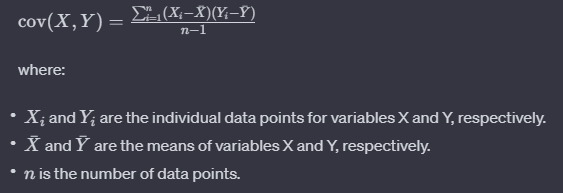

In a simplified form for a population (not a sample), you would divide by \(n\) instead of \(n-1\). The division by \(n-1\) in the sample formula corrects for bias in the estimation of population covariance when working with a sample of data rather than the entire population.

# Answer 4. For a dataset with the following categorical variables: Color (red, green, blue), Size (small, medium, large), and Material (wood, metal, plastic), perform label encoding using Python's scikit-learn library. Show your code and explain the output.

In [6]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Sample dataset with categorical variables
data = {'Color': ['red', 'green', 'blue', 'red', 'blue'],
        'Size': ['small', 'medium', 'large', 'small', 'medium'],
        'Material': ['wood', 'metal', 'plastic', 'wood', 'metal']}

df = pd.DataFrame(data)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
df['Color_Encoded'] = label_encoder.fit_transform(df['Color'])
df['Size_Encoded'] = label_encoder.fit_transform(df['Size'])
df['Material_Encoded'] = label_encoder.fit_transform(df['Material'])

# Display the original and encoded dataframe
print("Original DataFrame:")
print(df[['Color', 'Size', 'Material']])
print("\nEncoded DataFrame:")
print(df[['Color_Encoded', 'Size_Encoded', 'Material_Encoded']])


Original DataFrame:
   Color    Size Material
0    red   small     wood
1  green  medium    metal
2   blue   large  plastic
3    red   small     wood
4   blue  medium    metal

Encoded DataFrame:
   Color_Encoded  Size_Encoded  Material_Encoded
0              2             2                 2
1              1             1                 0
2              0             0                 1
3              2             2                 2
4              0             1                 0


# Answer 5. Calculate the covariance matrix for the following variables in a dataset: Age, Income, and Education level. Interpret the results.

In [7]:
import numpy as np
import pandas as pd

# Sample dataset with variables: Age, Income, and Education Level
data = {'Age': [25, 30, 35, 40, 45],
        'Income': [50000, 60000, 75000, 90000, 80000],
        'Education_Level': [12, 16, 18, 14, 20]}

df = pd.DataFrame(data)

# Calculate the covariance matrix
covariance_matrix = np.cov(df, rowvar=False)

# Display the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
[[6.250e+01 1.125e+05 1.750e+01]
 [1.125e+05 2.550e+08 2.250e+04]
 [1.750e+01 2.250e+04 1.000e+01]]


# Answer 6. You are working on a machine learning project with a dataset containing several categorical variables, including "Gender" (Male/Female), "Education Level" (High School/Bachelor's/Master's/PhD), and "Employment Status" (Unemployed/Part-Time/Full-Time). Which encoding method would you use for each variable, and why?

In [8]:
import numpy as np
import pandas as pd

# Sample dataset with variables: Age, Income, and Education Level
data = {'Age': [25, 30, 35, 40, 45],
        'Income': [50000, 60000, 75000, 90000, 80000],
        'Education_Level': [12, 16, 18, 14, 20]}

df = pd.DataFrame(data)

# Calculate the covariance matrix
covariance_matrix = np.cov(df, rowvar=False)

# Display the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
[[6.250e+01 1.125e+05 1.750e+01]
 [1.125e+05 2.550e+08 2.250e+04]
 [1.750e+01 2.250e+04 1.000e+01]]


Interpreting the results:

1. Diagonal Elements:

The diagonal elements of the covariance matrix represent the variances of individual variables. For example, the element at (1,1) corresponds to the variance of Age, (2,2) corresponds to the variance of Income, and (3,3) corresponds to the variance of Education Level.

2. Off-Diagonal Elements:

The off-diagonal elements represent the covariances between pairs of variables. For instance, the element at (1,2) represents the covariance between Age and Income, (1,3) represents the covariance between Age and Education Level, and (2,3) represents the covariance between Income and Education Level.

4. Interpretation:

A positive covariance indicates a positive linear relationship between the two variables, meaning that as one variable increases, the other tends to increase as well.
A negative covariance indicates a negative linear relationship, suggesting that as one variable increases, the other tends to decrease.
The magnitude of the covariance is not standardized, so it can be challenging to compare covariances directly.

5. Strength of Relationship:

To assess the strength of the relationship between variables, it's common to standardize the covariance to obtain the correlation coefficient. The correlation coefficient provides a normalized measure of the strength and direction of the linear relationship between two variables.

# Answer 7. You are analyzing a dataset with two continuous variables, "Temperature" and "Humidity", and two categorical variables, "Weather Condition" (Sunny/Cloudy/Rainy) and "Wind Direction" (North/South/East/West). Calculate the covariance between each pair of variables and interpret the results.

To calculate the covariance between pairs of variables (Temperature and Humidity) and (Temperature and Humidity) in the presence of categorical variables (Weather Condition and Wind Direction), you need to perform separate analyses for the continuous and categorical variables.

Here's a step-by-step approach:

1. Continuous Variables (Temperature and Humidity):

In [9]:
import numpy as np
import pandas as pd

# Sample dataset with variables: Temperature, Humidity, Weather Condition, Wind Direction
data = {'Temperature': [25, 30, 35, 40, 45],
        'Humidity': [60, 65, 70, 75, 80],
        'Weather Condition': ['Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Rainy'],
        'Wind Direction': ['North', 'South', 'East', 'West', 'North']}

df_continuous = pd.DataFrame(data, columns=['Temperature', 'Humidity'])

# Calculate the covariance matrix for continuous variables
covariance_matrix_continuous = np.cov(df_continuous, rowvar=False)

# Display the covariance matrix for continuous variables
print("Covariance Matrix for Continuous Variables:")
print(covariance_matrix_continuous)


Covariance Matrix for Continuous Variables:
[[62.5 62.5]
 [62.5 62.5]]


2. Categorical Variables (Weather Condition and Wind Direction):
Since covariance is not directly applicable to categorical variables, we will perform a frequency analysis or use other appropriate measures for categorical variables.

In [11]:
import numpy as np
import pandas as pd

# Sample dataset with variables: Temperature, Humidity, Weather Condition, Wind Direction
data = {'Temperature': [25, 30, 35, 40, 45],
        'Humidity': [60, 65, 70, 75, 80],
        'Weather Condition': ['Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Rainy'],
        'Wind Direction': ['North', 'South', 'East', 'West', 'North']}

df = pd.DataFrame(data)

# Continuous variables: Temperature and Humidity
df_continuous = df[['Temperature', 'Humidity']]

# Categorical variables: Weather Condition and Wind Direction
df_categorical = df[['Weather Condition', 'Wind Direction']]

# Calculate the covariance matrix for continuous variables
covariance_matrix_continuous = np.cov(df_continuous, rowvar=False)

# Display the covariance matrix for continuous variables
print("Covariance Matrix for Continuous Variables:")
print(covariance_matrix_continuous)

# Create contingency tables for categorical variables
contingency_table_weather = pd.crosstab(df_categorical['Weather Condition'], df_categorical['Wind Direction'])
contingency_table_wind = pd.crosstab(df_categorical['Wind Direction'], df_categorical['Weather Condition'])

# Display the contingency tables
print("\nContingency Table for Weather Condition and Wind Direction:")
print(contingency_table_weather)
print("\nContingency Table for Wind Direction and Weather Condition:")
print(contingency_table_wind)


Covariance Matrix for Continuous Variables:
[[62.5 62.5]
 [62.5 62.5]]

Contingency Table for Weather Condition and Wind Direction:
Wind Direction     East  North  South  West
Weather Condition                          
Cloudy                0      0      1     0
Rainy                 1      1      0     0
Sunny                 0      1      0     1

Contingency Table for Wind Direction and Weather Condition:
Weather Condition  Cloudy  Rainy  Sunny
Wind Direction                         
East                    0      1      0
North                   0      1      1
South                   1      0      0
West                    0      0      1


Interpretation:
Continuous Variables (Temperature and Humidity):
1. Diagonal Elements:

The diagonal elements represent the variances of individual variables (Temperature and Humidity).

2. Off-Diagonal Element (1,2):

The element at (1,2) represents the covariance between Temperature and Humidity.
Categorical Variables (Weather Condition and Wind Direction):

3. Contingency Tables:

The contingency tables show the frequency distribution of combinations of categorical variables.
 
4. Analysis:

Analyzing the contingency tables, you can observe how the frequency of Weather Condition and Wind Direction combinations is distributed.

5. Interpretation:

The contingency tables help understand the joint distribution of categorical variables, providing insights into the relationships between different categories.
It's important to note that covariance is most meaningful and interpretable for continuous variables. For categorical variables, other measures like chi-square tests, Cramer's V, or measures of association may be more appropriate for assessing relationships.